#  Crimes In Israel

Preparing and cleaning the data

In [159]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix
import matplotlib.cm as cmx



plt.rcParams["figure.figsize"] = (15, 7)

crimes_path = 'crimes.xlsx'
cities_path = 'cities.xlsx'
mapping_path = 'mapping.xlsx'

dictionary = {
    'עבירות בטחון' : 'Security',
    'עבירות כלפי המוסר' : 'Moral',
    'עבירות כלפי הרכוש' : 'Property Offense',
    'עבירות מין' : 'Sex Offense',
    'עבירות מרמה' : 'Fraud',
    'עבירות נגד אדם' : 'Human Offense',
    'עבירות נגד גוף' : 'Body Offense',
    'עבירות סדר ציבורי' : 'Public Disorder',
    'עבירות רשוי' : 'Licensing Offense',
    'עבירות תנועה' : 'Traffic Offense',
}
selected_crimes = [
    'עבירות בטחון',
    'עבירות כלפי המוסר',
    'עבירות כלפי הרכוש',
    'עבירות מין',
    'עבירות מרמה',
    'עבירות נגד אדם',
    'עבירות נגד גוף',
    'עבירות סדר ציבורי',
    'עבירות רשוי',
    'עבירות תנועה',

]


mapping_sheets = {}
target_years = [2019,2018,2017,2016,2015,2014]

working_hours =  {
    'Security':20,
     'Moral':15,
     'Property Offense':10,
     'Sex Offense':35,
     'Fraud':25,
     'Human Offense':40,
     'Body Offense':30,
     'Public Disorder':1,
     'Licensing Offense':1,
    'Traffic Offense':2,
}

#Below 3 dictionaries , each stores titles/words/phrases translations for each .xlsx file 
#These will be used to select relevant data and get the translation in english.
#crimes.xlsx
crimes_dictionary = {
    'עבירות בטחון' : 'Security',
    'עבירות כלפי המוסר' : 'Moral',
    'עבירות כלפי הרכוש' : 'Property Offense',
    'עבירות מין' : 'Sex Offense',
    'עבירות מרמה' : 'Fraud',
    'עבירות נגד אדם' : 'Human Offense',
    'עבירות נגד גוף' : 'Body Offense',
    'עבירות סדר ציבורי' : 'Public Disorder',
    'עבירות רשוי' : 'Licensing Offense',
    'עבירות תנועה' : 'Traffic Offense'
}
#cities.xlsx
cities_dictionary = {
    'שם יישוב באנגלית' : 'City Name',
    'סמל יישוב' : 'City Code',
    "מחוז"  :"area",
    "קואורדינטות" : "coords",
    "גובה" : "height",
    'נפה' : 'District',
    'אזור טבעי' : 'Natural Area',
    'מעמד מונציפאלי' : 'Municipal status',
    'שיוך מטרופוליני' : 'Metropolitan Affiliation',
    'דת יישוב' : 'Religion',
    'סך הכל אוכלוסייה 2018' : 'Total Residents',
    'יהודים ואחרים' : 'Jews And Others',
    'מזה: יהודים' : 'Jews',
    'ערבים' : 'Arabs',
    'שנת ייסוד' : 'Founding Year',
    'צורת יישוב שוטפת' : 'Residence Shape',
    'השתייכות ארגונית' : 'Organizational Affiliation',
    'ועדת תכנון' : 'Planning Committee',
    'מרחב משטרה' : 'Police Stations',
    'אשכול רשויות מקומיות' : 'Local Authority Cluster'
}

#mapping.xlsx
mapping_dictionary = {
    'מחוז ,נפה ותת-הנפה':{
        'sheet':'District',
        'columns':{
            'ס מ ל':'code',
            'מ ח ו ז':'district',
            'נ פ ה':'sub district',
            'תת-נפה':'sub sub district'
        }
    },
    'מעמד מוניציפלי':{
        'sheet':'Municipal status',
        'columns':{
            'הסמל':'code',
            'באור':'description'
        }
    },
    'אזור טבעי':{
        'sheet':'Natural Area',
        'columns':{
            'סמל':'code',
            'מחוז':'district',
            'נפה':'sub district',
            'שם האזור הטבעי':'area name'
        }
    },
    'דת יישוב':{
        'sheet':'Religion',
        'columns':{
            'הסמל':'code',
            'באור':'description'
        }
    },
    'סמלי ועדת תכנון':{
        'sheet':'Planning Committee',
        'columns':{
            'סמל הוועדה':'code',
            'שם הוועדה':'name'
        }
    },
    'שיוך למטרופולין':{
        'sheet':'Metropolitan Affiliation',
        'columns':{
            'סמל':'code',
            'שם המטרופולין':'name',
            'טבעת':'ring',
            'גזרה':'cut',
        }
    },
    'צורת יישוב':{
        'sheet':'Residence Shape',
        'columns':{
            'ס מ ל':'code',
            'סוג היישוב':'type',
            'צ ו ר ת  י י ש ו ב':'shape'
        }
    },
    'השתייכות ארגונית':{
        'sheet':'Organizational Affiliation',
        'columns':{
            'סמל':'code',
            'השתייכות ארגונית':'description'
        }
    },
    'תחנות משטרה':{
        'sheet':'Police Stations',
        'columns':{
            'סמל':'code',
            'תחנה':'station',
            'מרחב':'Area',
            'מחוז':'district'
        }
    },
    'אשכול רשויות מקומי':{
        'sheet':'Local Authority Cluster',
        'columns':{
            'סמל אשכול':'code',
            'שם אשכול':'authority name'
        }
    }
}

#Given sheet_index , return the relevant sheet form the mapping.xlsx file
def getMappingSheetDF(sheet_index):
    xls = pd.ExcelFile(mapping_path)
    try:
        return xls.parse(sheet_index)
    except:
        return None

def clear_crimes_df():
    #Get crimes file and store it into a temporary variable.
    #We will build a new dataframe with relevant columns and fields only.
    tmp_crimes_df = pd.read_excel(crimes_path,dtype=object)
    #remove irrelevant columns
    tmp_crimes_df.drop('Total', axis=1, inplace=True)
    tmp_crimes_df.drop('שנת הודעה', axis=1, inplace=True)

    #get offenses columns in english (from the previously set heb-eng dictionary)
    offenses_columns = np.array(list(crimes_dictionary.values()))
    #Combine 'city_name' , 'city_code' and 'year' columns with the offenses columns and store them into crimes_new_df columns array. (This will represent the columns of our new crimes dataframe)
    crimes_new_df_columns = np.concatenate((['city_name','city_code','year'],offenses_columns))
    #initilize the crimes_df with the relevant columns
    crimes_df = pd.DataFrame(columns = crimes_new_df_columns)
    helper = []
    #loops over the cities and get the dataframe split of each city.
    for city_name in tmp_crimes_df['יישוב מחושב'].unique():
        #get the relevant dataframe split.
        df_by_city =tmp_crimes_df[tmp_crimes_df['יישוב מחושב'] == city_name]
        valid_row = df_by_city['סמל יישוב'].iloc[0] > 0
        if valid_row :
            valid_row = df_by_city is not None and city_name != 'Total'
        if valid_row:
            #get the total number of offenses
            rows_len = len(df_by_city)
            #prepare a row set to be added to crimes_df
            #row = {'city_name':city_name,'city_code':df_by_city['סמל יישוב'].iloc[0]}
            row = {'city_name':city_name,'city_code':'city_'+str(df_by_city['סמל יישוב'].iloc[0])}
            #loops over the offenses for the current city and if the offense is relevant (Exists in the previously made dictionary) then 
            # get the value for a specific offense for each year (2014-2019) and add it to the row set. 
            #each row set represents a new row in the newly created crimes_df
            for year in target_years:
                row['year'] = year
                for index in range(0,rows_len):
                    offense = df_by_city.iloc[index,2]
                    if offense in crimes_dictionary:
                        offense_en=crimes_dictionary[offense]
                        row[offense_en]=df_by_city[year].values[index]
                #13 represents number of values a valid row should hold , 10 offenses + 3 unique values (city name , city code and year)
                if len(row) == 13 :
                    crimes_df = crimes_df.append(row, ignore_index=True)
                    #after updating the crimes_df , reset the row set to its initial value
                    #row = {'city_name':city_name,'city_code':df_by_city['סמל יישוב'].iloc[0]}
                    row = {'city_name':city_name,'city_code':'city_'+str(df_by_city['סמל יישוב'].iloc[0])}
    
    #replace '-' with zeros
    crimes_df = crimes_df.replace('-', 0)
    return crimes_df
    #export to xlsx file
    #crimes_df.to_excel("./cleared_data/crimes_cleared.xlsx")

def clear_cities_df():
    #read cities file
    cities_df =  pd.read_excel(cities_path,dtype=object)
    #drop irrelevant columns
    drop_list = ["שם יישוב","תעתיק","שנה"]
    cities_df.drop(drop_list, axis=1, inplace=True)
    cities_df = cities_df.rename(columns = cities_dictionary, inplace = False)
    cities_df.replace(np.nan,-1, inplace = True)
    #export to xlsx file
    #cities_df.to_excel("./cleared_data/cities_cleared.xlsx")
    return cities_df

def clear_mapping_df():
    index_sheet = getMappingSheetDF(0)
    relevant_sheets_indexes = index_sheet.iloc[2:,1].values

    for sheet_number in relevant_sheets_indexes:
        sheet_df = getMappingSheetDF(sheet_number)
        if sheet_df is not None:
            cleared = clear_sheet(sheet_df)
            if cleared is not None:
                mapping_sheets[cleared['title']]=cleared['df']
                #cleared['df'].to_excel('./cleared_data/'+cleared['title']+".xlsx")
    #mapping is ready.
    print()


#Get a current mapping sheet and return a re-built formatted dataframe out of it.
def clear_sheet(sheet_df):
    #make a copy of the original sheet
    to_clear = sheet_df.copy()
    _tmp_cols = list(to_clear.columns)
    #Fill Nan with the last known value in same column.
    target_title = list(filter(lambda x: not x.startswith('Unnamed'), _tmp_cols))
    sheet_title = target_title[0].strip()
    sheet_dict = mapping_dictionary[sheet_title]

    if sheet_dict is None:
        return None
    
    sheet = sheet_dict['sheet']
    #init res variable
    res = {'title':sheet , 'df':None}

    columns_dict = sheet_dict['columns']

    _columns = list(columns_dict.values())

    #flip our _columns values (ltr-rtl) to maintain the order of the data
    flipped_cols = np.flip(_columns,0)

    if sheet == 'District' :
        #replace the current cols with the flipped ones
        to_clear.columns = flipped_cols
        #remove extra non-relevant rows
        to_clear.drop(range(0,2),inplace=True)
        to_clear.drop(range(27,31),inplace=True)
        to_clear['district'].fillna(method='ffill', inplace=True)
        to_clear['sub sub district'].replace(np.nan,"None", inplace=True)
        #return the columns flipped (reverse-ordered)
        #to make it more readable in english.

    if sheet == 'Municipal status' :
        to_clear = sheet_df.iloc[2:4].copy()
        to_clear.columns = flipped_cols
        to_clear = to_clear.append({'description':'None','code':'-1'}, ignore_index=True)
        for ind in range(1,79):
            if ind < 10 :
                to_clear = to_clear.append({'description':'None','code':'0'+str(ind)}, ignore_index=True)
            else :
                to_clear = to_clear.append({'description':'מועצה אזורית','code':str(ind)}, ignore_index=True)

    if sheet == 'Natural Area':
        to_clear = sheet_df.iloc[:,2:].copy()
        to_clear.drop(range(0,2),inplace=True)
        to_clear.columns = flipped_cols
        to_clear['district'].fillna(method='ffill', inplace=True)
        to_clear['sub district'].fillna(method='ffill', inplace=True)
        to_clear['sub district'].replace(np.nan,"None", inplace=True)

    if sheet == 'Religion' or sheet == 'Planning Committee' or sheet == 'Metropolitan Affiliation' or sheet == 'Residence Shape':
        to_clear.drop(range(0,2),inplace=True)
        to_clear.columns = flipped_cols

    if sheet == 'Metropolitan Affiliation' :
        to_clear['name'].fillna(method='ffill', inplace=True)
        to_clear['ring'].fillna(method='ffill', inplace=True)
        to_clear['ring'].replace(np.nan,"None", inplace=True)

    if sheet == 'Residence Shape' :
        to_clear['type'].fillna(method='ffill', inplace=True)
        to_clear.drop([2,19],inplace=True)
        
    if sheet == 'Organizational Affiliation' or sheet == 'Local Authority Cluster' :
        to_clear.drop(range(0,3),inplace=True)
        to_clear.columns = flipped_cols

    if sheet == 'Police Stations':
        to_clear.drop(range(0,3),inplace=True)
        to_clear.columns = _columns
        to_clear['district'].fillna(method='ffill', inplace=True)
        to_clear['Area'].fillna(method='ffill', inplace=True)
        #to reverse the flip
        to_clear = to_clear.loc[:,::-1]

    res['df'] =  to_clear.loc[:,::-1]
    return res

#This method init our datasets with clear, arranged and ready-to-use structures.
def init():
    #clear crimes dataframe from non-relevant data for the analysis
    # build an arranged dataframe with focus on relevant data only.
    clear_crimes_df()
    # do the same for citites df
    clear_cities_df()
    # loop through each sheet from the mapping file and build a formated dataframe for each sheet.
    #clear_mapping_df()


crimes_df = None
cities_df = None
#This is where we store our cleared and formatted data for usuage later.
crimes_df = clear_crimes_df()
cities_df = clear_cities_df()
clear_mapping_df()
display(crimes_df)
display(cities_df)


cluster_df = crimes_df.copy()
cluster_df = cluster_df.applymap(lambda x: str(x).lstrip('city_')) 
cluster_df["city_code"] = pd.to_numeric(cluster_df["city_code"])
cluster_df = pd.merge(cluster_df,cities_df,left_on="city_code",right_on="City Code")

cluster_df['Total Residents']= pd.to_numeric(cluster_df['Total Residents'])
cluster_df['Sex Offense']= pd.to_numeric(k_df['Sex Offense'])
cluster_df['year']= pd.to_numeric(k_df['year'])

,city_name,city_code,year,Security,Moral,Property Offense,Sex Offense,Fraud,Human Offense,Body Offense,Public Disorder,Licensing Offense,Traffic Offense
0,אבו גוש,city_472,2019,7,14,93,5,5,0,113,202,0,1
1,אבו גוש,city_472,2018,9,5,91,9,9,0,105,167,0,0
2,אבו גוש,city_472,2017,8,11,94,4,7,2,123,175,0,2
3,אבו גוש,city_472,2016,6,6,95,7,10,3,138,191,0,4
4,אבו גוש,city_472,2015,15,8,87,5,14,1,116,185,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,תל שבע,city_1054,2018,84,83,217,1,17,6,188,444,10,13
1052,תל שבע,city_1054,2017,80,71,177,7,14,9,202,344,9,16
1053,תל שבע,city_1054,2016,62,39,180,2,8,2,189,316,8,12
1054,תל שבע,city_1054,2015,58,35,188,4,10,8,171,262,1,9


,City Code,area,District,Natural Area,Municipal status,Metropolitan Affiliation,Religion,Total Residents,Jews And Others,Jews,Arabs,Founding Year,Residence Shape,Organizational Affiliation,coords,height,Planning Committee,Police Stations,City Name,Local Authority Cluster
0,967,6,62,623,-1,-1,3,-1,-1,-1,-1,-1,460,-1,2040057100,-1,699,15003711,Abu Juway'ad,-1
1,472,1,11,111,99,444,2,7543,97,79,7446,-1,280,-1,2105263481,598,152,10002475,Abu Ghosh,-1
2,473,2,24,245,99,-1,2,13915,28,11,13887,-1,270,-1,2160776284,19,252,10004315,Abu Sinan,-1
3,935,6,62,623,-1,-1,3,-1,-1,-1,-1,-1,460,-1,1865057450,-1,699,10001937,Abu Surayhan,-1
4,958,6,62,623,-1,-1,3,-1,-1,-1,-1,-1,460,-1,1850057900,-1,699,10001937,Abu 'Abdun,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,665,6,62,621,39,-1,1,699,699,699,-1,1949,310,2,1600359560,109,651,10001930,Tequma,620
1478,3563,7,76,-1,76,445,1,3882,3880,3840,2,1977,190,-1,2218961753,566,714,15000586,Teqoa,-1
1479,970,6,62,623,-1,-1,3,-1,-1,-1,-1,-1,460,-1,1830056400,-1,699,10001946,Tarabin as-Sani',-1
1480,1346,6,62,623,69,341,2,1089,6,6,1083,-1,450,-1,1752658369,210,624,10001946,Tarabin As-Sani,610


**Question 2**

              year     Security        Moral  Property Offense  Sex Offense  \
count  1056.000000  1056.000000  1056.000000       1056.000000  1056.000000   
mean   2016.500000    41.828598   158.548295        696.560606    30.184659   
std       1.708634   288.001320   346.820780       1795.153030    73.441062   
min    2014.000000     0.000000     0.000000         13.000000     0.000000   
25%    2015.000000     4.000000    18.000000         80.000000     2.000000   
50%    2016.500000    10.000000    55.000000        190.000000     7.000000   
75%    2018.000000    26.000000   150.250000        485.000000    28.000000   
max    2019.000000  5427.000000  3395.000000      19756.000000   750.000000   

             Fraud  Human Offense  Body Offense  Public Disorder  \
count  1056.000000    1056.000000   1056.000000      1056.000000   
mean     87.558712       3.310606    302.142045       605.129735   
std     245.452916       8.112019    636.832025      1302.386076   
min       0.0000

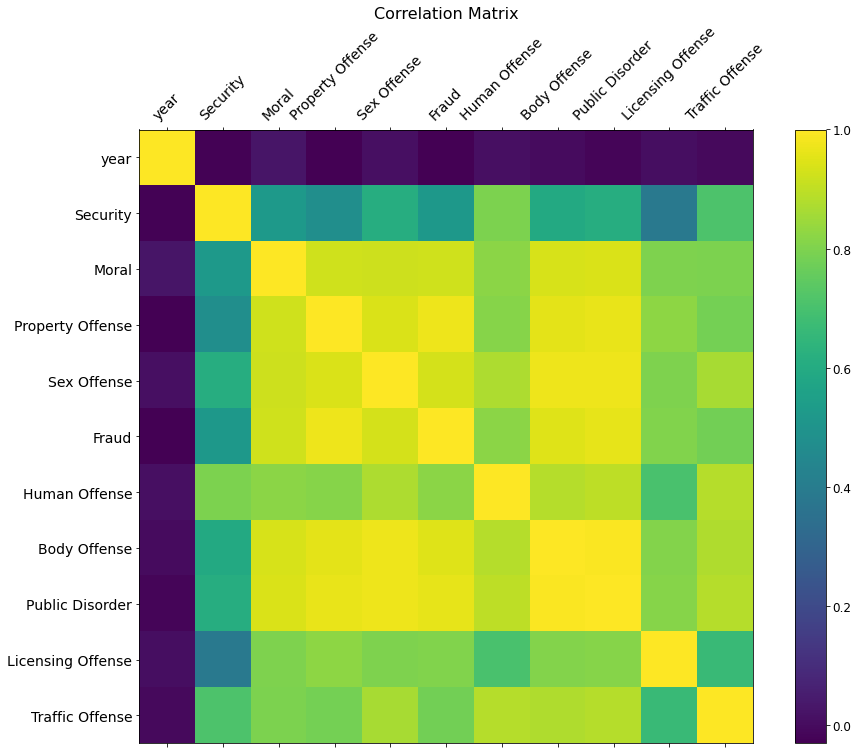

In [160]:
def q_2(crimes_df):
    print(crimes_df.describe())
    f = plt.figure(figsize=(15, 11))
    plt.matshow(crimes_df.corr(), fignum=f.number)
    plt.xticks(range(crimes_df.select_dtypes(['number']).shape[1]), crimes_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(crimes_df.select_dtypes(['number']).shape[1]), crimes_df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=12)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()
q_2(crimes_df)

Is there a correlation between religion and over all the amount of crimes each city has?
--
We will try to see if there's a correlation by presenting the data with bar charts.
We compared the earliest data(year 2019) and the oldest data(year 2014)

[2 1 4]


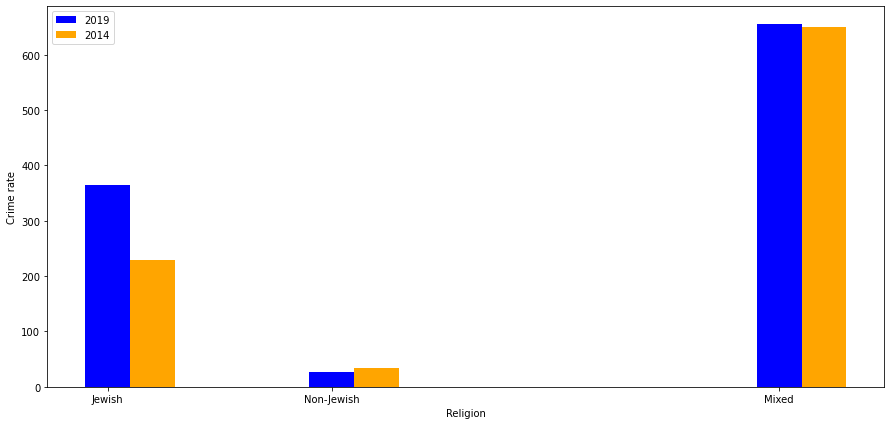

In [161]:
crimes =cluster_df
crimes['total']=cluster_df.iloc[:, 3:13].sum(axis=1)
def bar_graph(crimes):

    fig, ax = plt.subplots()
    #ax = fig.add_axes([0,0,1,1])
    y1 = crimes.loc[crimes['year']==2019,'total']
    y2 = crimes.loc[crimes['year']==2014,'total']
    x1 = crimes.loc[crimes['year']==2019,'Religion']
    x2 = crimes.loc[crimes['year']==2014,'Religion']
    width =0.2
    
    plt.bar(x1, y1, width, color='blue')
    plt.bar(x2+0.2, y2, width, color='orange')
    print(x1.unique())
    plt.xticks(x1.unique(), ['Non-Jewish', 'Jewish', 'Mixed'])
    plt.xlabel("Religion")
    plt.ylabel("Crime rate")
    plt.legend(["2019", "2014"])
    plt.show()
bar_graph(crimes)

As a result we got that mixed areas have signifcintly more crimes than non-mixed areas.
mixed cities are known as the areas with the largest population in the country, so we decided to work on crime percentages not actual number of crimes.

,city_name,city_code,year,Security,Moral,Property Offense,Sex Offense,Fraud,Human Offense,Body Offense,...,Residence Shape,Organizational Affiliation,coords,height,Planning Committee,Police Stations,City Name,Local Authority Cluster,total,total_percentage
0,אבו גוש,472,2019,7,14,93,5,5,0,113,...,280,-1,2105263481,598,152,10002475,Abu Ghosh,-1,5,0.000663
1,אבו גוש,472,2018,9,5,91,9,9,0,105,...,280,-1,2105263481,598,152,10002475,Abu Ghosh,-1,9,0.001193
2,אבו גוש,472,2017,8,11,94,4,7,2,123,...,280,-1,2105263481,598,152,10002475,Abu Ghosh,-1,4,0.000530
3,אבו גוש,472,2016,6,6,95,7,10,3,138,...,280,-1,2105263481,598,152,10002475,Abu Ghosh,-1,7,0.000928
4,אבו גוש,472,2015,15,8,87,5,14,1,116,...,280,-1,2105263481,598,152,10002475,Abu Ghosh,-1,5,0.000663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,תל שבע,1054,2018,84,83,217,1,17,6,188,...,260,-1,1867057304,280,652,10001937,Tel Sheva,-1,1,0.000049
1052,תל שבע,1054,2017,80,71,177,7,14,9,202,...,260,-1,1867057304,280,652,10001937,Tel Sheva,-1,7,0.000346
1053,תל שבע,1054,2016,62,39,180,2,8,2,189,...,260,-1,1867057304,280,652,10001937,Tel Sheva,-1,2,0.000099
1054,תל שבע,1054,2015,58,35,188,4,10,8,171,...,260,-1,1867057304,280,652,10001937,Tel Sheva,-1,4,0.000198


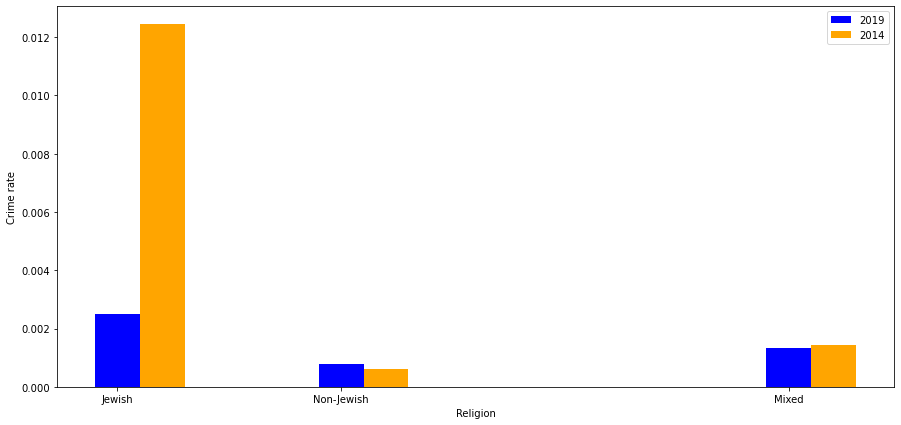

In [162]:
#deviding the total number of crimes by the city`s population
crimes['total_percentage'] = (crimes['total']/ crimes['Total Residents'])
display(crimes)
def graphs(crimes):
    #fig = plt.figure()
    fig, ax = plt.subplots()
    #ax = fig.add_axes([0,0,1,1])
    y1 = crimes.loc[crimes['year']==2019,'total_percentage']
    y2 = crimes.loc[crimes['year']==2014,'total_percentage']
    x1 = crimes.loc[crimes['year']==2019,'Religion']
    x2 = crimes.loc[crimes['year']==2014,'Religion']
    width =0.2
    
    plt.bar(x1, y1, width, color='blue')
    plt.bar(x2+0.2, y2, width, color='orange')
    #print(x1.unique())
   
    plt.xticks(x1.unique(), ['Non-Jewish', 'Jewish', 'Mixed'])
    plt.xlabel("Religion")
    plt.ylabel("Crime rate")
    plt.legend(["2019", "2014"])
    plt.show()

graphs(crimes)    

As we can see we got very different results than the first bar graph, as a result we can see that Jewish areas have the highest crime rates, and we can see a huge decilne in crimes in the year 2019 compared to 2014 in Jewish areas, we think there's a huge different since in 2014 the country was in war.
the results still don't make sense, since there's more jewish areas in the country than non-jewish cities, while there's very few mixed areas in the country.
So to get more accurate results, we need to take that into account.


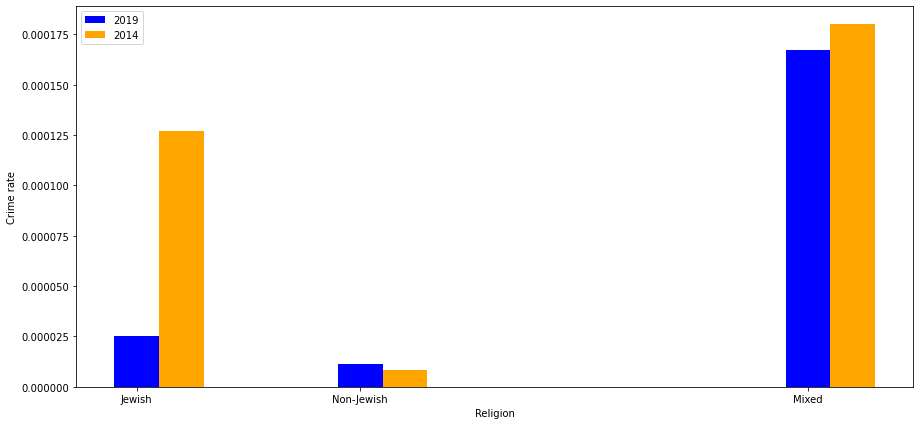

In [163]:
#creating a new column that includes how many areas in the country there is for that area's religion 
# deviding by 6, since each area is counted 6 times for each year
crimes['count'] = crimes.groupby('Religion')['city_code'].transform('count')/6
# deviding the percentage by the number of areas 
crimes['total_percentage'] = (crimes['total_percentage']/ crimes['count'])
graphs(crimes)

As we cen see, mixed areas have the largest amount of crimes, compared to areas that are only Jewish or non-Jewish, they have close rates and far less crimes than mixed areas.
Even though mixed areas make up a very small percentage of all areas in the country, they are the major cities with the largest population, which explains the results we got.
Those results are the most accurate and make the most sense.
we can still see a bif difference between crime rates in 2014 and 2019 in Jewish areas.

**Question 3**
--

Reasearch Question: 
--
Does sex offense charges change by the city form and religon, whether it is a city, village or a kibbutz where the majority are jewish or not jewish?

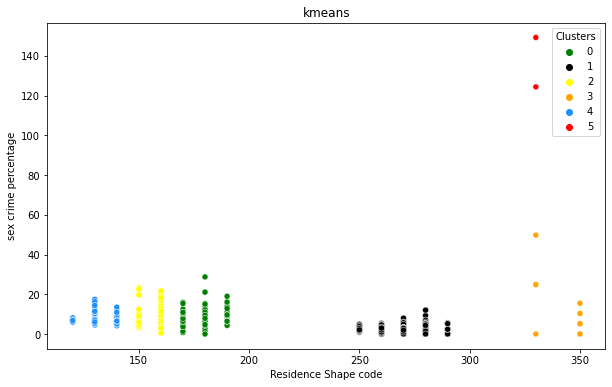

In [164]:

def q_3_kmeans(k_df):

    #k_df =pd.merge(new_df, cities_df, left_on = 'city_code', right_on = 'סמל יישוב')
    k_df['percentage'] = (k_df['Sex Offense']/ k_df['Total Residents'])*10000
    kmeans = cluster.KMeans(n_clusters=6 ,init="k-means++")
    kmeans = kmeans.fit(k_df[['percentage','Residence Shape', 'Religion']])
    kmeans.cluster_centers_

    k_df['Clusters'] = kmeans.labels_
    
    X = k_df[['percentage','Residence Shape', 'Religion']]

    y_kmeans = kmeans.predict(X)
    
    plt.figure(figsize=(10,6))
    ax = sns.scatterplot(x="Residence Shape", y="percentage",hue = 'Clusters',  data=k_df, palette=['green','black','yellow','orange','dodgerblue','red'])
    ax.set(xlabel='Residence Shape code', ylabel='sex crime percentage')
    plt.title('kmeans')
    plt.show()

q_3_kmeans(cluster_df)

  Kmeans
--
     before running the results we expected cities to have higher percentages, compared to kibbuts and villages.
     -- The algorithm clusters the points perfectly, dividing cities with a majority non jewish population in one cluster, while cities with jewish majority were clustered togther. 
     --depending on the number of clusters we got diffrent results, the higher the number of clusters, the more accurate results we got, but also not too high, we chose 6 clusters, since there's 3 types of things we want to check with the results, city or village, Jewish and non-Jewish and lastly the population size.

In [165]:
#find the labels for Resident shape codes for better understanding
display(mapping_sheets['Residence Shape'])

,code,type,shape
3,120,יישוב עירוני,"יישובים יהודיים 500,000 תושבים ומעלה"
4,130,יישוב עירוני,"יישובים יהודיים 499,999-200,000 תושבים"
5,140,יישוב עירוני,"יישובים יהודיים 199,999-100,000 תושבים"
6,150,יישוב עירוני,"יישובים יהודיים 99,999-50,000 תושבים"
7,250,יישוב עירוני,"יישובים לא יהודיים 99,999-50,000 תושבים"
...,...,...,...
27,450,יישוב כפרי,"יישובים כפריים אחרים, לא-יהודיים"
28,460,יישוב כפרי,"שבטי בדווים (אוכלוסייתם כלולה ב""גרים מחוץ לייש..."
29,510,"""מקום""","נקודה שאיננה יישוב (האוכלוסייה כלולה ב""גרים מח..."
30,520,"""מקום""",מוקד תעסוקה


Now that we have the labels for each code we can analyze the results we got:

**Cities with a Jewish majority are clustered together, and further clustered by its size:**
- From the labels of the codes, we can see that codes between 0-140 that are clustered together (colored green) belong to a Jewish majority areas with large number of population (more than 100,000), which means it's a large city
- while the second cluster (colored yellow) that ranges between 150-160 belongs to a Jewish majority with a population between 20,000 to 50,000, which means it's a medium sized city.
- the third cluster (colored blue) that ranges between codes 170-190 represents areas with a Jewish majority with a populations of 5,000 to 20,000(small cities).


**Cities with a Non-Jewish majority are all clustered together in one cluster(colored black)**
- codes that range between 250-290 which represent cities with a population between 2,000 to 100,000 are clustered together, which is less accurate from the clustering that we got for Jewish majority cities.


**At last, villages are  and Kibbutzes have an overlap and are clustred further**
- the areas with code 330 which represents Kibbutz are clustred into two clustres,one colored red with the hishest rates of sexual offenses, this cluster shows the highest rates of sex crimes compared to other groups, which means, in those areas, sex offenses are more likely to happen or **are more likely to be reported to the police** since not all sexual harassment are reported. 
- areas with codes 330 and 350 which represent Kibbutz and villages are clustred togther,colored orange, they represent the village Resident shape with Jewish majorties that also have high rates of sexual offenses.


**In a conclusion, women in villages and Kibbutz are either more likely to be sexually harassed, or more likely to report it, while in areas where it shows that the least rates of sexual crimes are in non-Jewish areas (clusters red and black), which means that women in those areas are either less likely to be sexually harassed or less likely to report it** 💔 

  GaussianMixture
--
     We got good results with k-means but we will try the GaussianMixture algorithm to see if we can get diffrent or more accurate results.

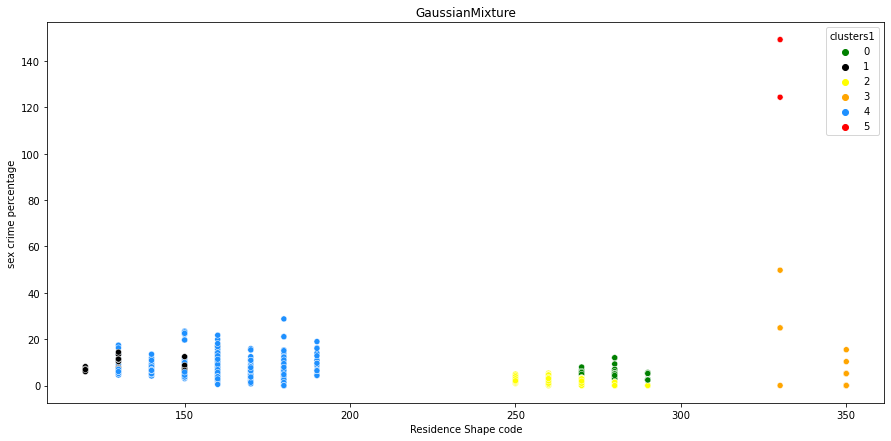

In [166]:
def q_3_gm(gm_df):
    gm = GaussianMixture(n_components=6, random_state=0).fit(gm_df[['percentage','Residence Shape', 'Religion']])
    gm.means_
    clusters1 = gm.predict(gm_df[['percentage','Residence Shape', 'Religion']])
    gm_df['clusters1'] = clusters1
    ax=sns.scatterplot(x="Residence Shape", y="percentage",hue = 'clusters1',  data=gm_df, palette=['green','black','yellow','orange','dodgerblue','red'])
    ax.set(xlabel='Residence Shape code', ylabel='sex crime percentage')
    plt.title('GaussianMixture')
    plt.show()
q_3_gm(cluster_df)

As we can see from the scatterplot, we got different results from the kmeans algorithm and defintely not as accurate as the kmeans clustring algorithm results, since clusters colored blue and black overlap,which are Jewish areas with different population sizes, while with the kmeans clustring algorithm they were clustered perfectly.
Different from the kmeans algorithm, we got two clusters for non-Jewish areas but they overlap.
For the villages areas we got the same clusters.

**Question 5**
--

In this question we want to predict the total number of crimes in the following cities: 
'באר שבע' , "סח'נין", 'אילת','קרית אתא','ראש פינה' in the year 2019.

To do that we split the data of crimes and cities(demographics, after choosing the relevant features) into train and test splits, furthermore we excluded the crime data that occurred in year 2019 from the training data, to make model less biased for the test data.
we split each of the training and test data into X and Y:
- X_train: we took all the data from year 2014 to 2018 and calculated the mean, for the crimes that occurred in those years and the demographics for each city.
- Y_train : includes total felonies in years 2014-2018 for each city(mean).
- X_test : same as X_train, the only difference is that we focused on the crimes that occurred in year 2019 for each city.
- Y_test : includes total felonies in year 2019 for each city(mean).


In [167]:
def q_5(clusters_data = None):
    crimes_relevant = crimes_df.copy()
    test_cities = [
        'באר שבע' ,
        "סח'נין",
        'אילת',
        'קרית אתא',
        'ראש פינה'
    ]
    test_cities_en = [
        'Ber Shevaa' ,
        "Sakhnen",
        'Eilat',
        'Kiryat Ata',
        'Rosh Pina'
    ]
    
    test_cities_codes = crimes_relevant[crimes_relevant['city_name'].isin(test_cities)]['city_code'].unique()

    test_citiy_codes_only = test_cities_codes.copy()
    #remove the city_prefix
    for ind,val in enumerate(test_citiy_codes_only): test_citiy_codes_only[ind]=int(val.split("city_")[1])
 

    # total crimes in a specific year:
    #crimes_df.loc[(crimes_df['city_name'] == 'טמרה') & (crimes_df['year'] == 2019)].iloc[:,3:].sum(axis=1)
    cities_relevant = cities_df.copy()

    drop_list = ["Natural Area","Municipal status","Metropolitan Affiliation","Religion","Founding Year","District"
     ,"Residence Shape","Organizational Affiliation","Planning Committee","Police Stations","Local Authority Cluster",]
    #drop_list = ["Founding Year"]
    cities_relevant.drop(drop_list, axis=1, inplace=True)
    

    if clusters_data is not None:
        cities_relevant = pd.merge(clusters_data,cities_relevant,on="City Code")

    #get the test samples demography
    test_df = cities_relevant[cities_relevant['City Code'].isin(test_citiy_codes_only)].copy()
    #drop City Code and City Name
    test_df.sort_values(by=['City Code'], inplace=True)
    test_df.drop(['City Name','City Code'], axis=1, inplace=True)
    #index goes by the order of test_cities_codes

    tmp_test = crimes_relevant[(crimes_relevant['city_code'].isin(test_cities_codes)) & (crimes_relevant['year'] == 2019)].copy()



    tmp_test_exclude_2019 = crimes_relevant[(crimes_relevant['city_code'].isin(test_cities_codes)) & (crimes_relevant['year'] != 2019)].copy() 
    test_grouped_df = tmp_test_exclude_2019.groupby("city_code")
    test_mean_df = test_grouped_df.mean()
    tmp_test_exclude_2019 = test_mean_df.reset_index()

    #to maintain the order of the rows
    tmp_test_exclude_2019.sort_values(by=['city_code'], inplace=True)
    tmp_test.sort_values(by=['city_code'], inplace=True)
    # city codes: 26,2600,6800,7500,9000

    tmp_test_exclude_2019.drop(['year','city_code'], axis=1, inplace=True)

    tmp_test_values = tmp_test_exclude_2019.values

    tmp_test.drop(['city_name','year','city_code'], axis=1, inplace=True)
    #** 
    testX = []
    test_data = test_df.values
    #
    
    #add crimes data to training set. (x)
    for ind,val in enumerate(test_data) :
        testX.append(list(tmp_test_values[ind])+list(test_data[ind]))

    testY = tmp_test.values
    tmpY = []
    for val in testY: tmpY.append(np.sum(val))
    testY = tmpY

    #now testX and testY are ready.

    #now to prepare the train data , we gotta remove the test_cities from training set.
    #clear cities from test cities.
    cities_relevant = cities_relevant[cities_relevant['City Code'].isin(test_citiy_codes_only) == False]

    crimes_relevant = crimes_relevant[crimes_relevant['city_code'].isin(test_cities_codes) == False]
    #drop rows where year 2019 exists
    crimes_relevant = crimes_relevant[crimes_relevant['year'] != 2019]
    crimes_relevant.drop(['city_name','year'], axis=1, inplace=True)
    #group rows by city_code
    grouped_df = crimes_relevant.groupby("city_code")
    mean_df = grouped_df.mean()
    crimes_relevant = mean_df.reset_index()
    #now the relevant crimes df is ready grouped by city_code.
    #get city codes values
    train_city_codes = crimes_relevant['city_code'].unique()
    #remove the city_prefix
    for ind,val in enumerate(train_city_codes): train_city_codes[ind]=int(val.split("city_")[1])


    train_df = cities_relevant[cities_relevant['City Code'].isin(train_city_codes)].copy()
    train_df.drop(['City Name','City Code'], axis=1, inplace=True)
    #drop city_code to get the rest of the values as Y
    crimes_relevant.drop(['city_code'], axis=1, inplace=True)
    #train Y is ready
    trainY = crimes_relevant.values
    trainX = []
    
    train_data = train_df.values

    #add crimes data to training set. (x)
    for ind,val in enumerate(train_data) :
        trainX.append(list(trainY[ind])+list(train_data[ind]))
    regr = AdaBoostRegressor(random_state=0, n_estimators=100)
    #re-format the trainY labels to hold the total number of felonies for each city
    tmp = []
    for val in trainY: tmp.append(np.sum(val))
    trainY=tmp

    ada_reg = AdaBoostRegressor(n_estimators=200)
    print(ada_reg)
    ada_reg.fit(trainX, trainY)
    scores = cross_val_score(ada_reg, trainX,trainY,cv=5)
    print("Mean cross-validataion score: %.2f" % scores.mean())
    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_val_score(ada_reg, trainX, trainY, cv=kfold )
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

    ypred = ada_reg.predict(testX)
    mse = mean_squared_error(testY,ypred)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % np.sqrt(mse))
    temp_x = []
    for ind, val in enumerate(testY):
        temp_x.append(test_cities_en[ind])
    x_ax = temp_x
    plt.scatter(x_ax, testY, s=5, color="blue", label="original")
    plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
    plt.legend()
    plt.xlabel("Cities")
    plt.ylabel("Total fellonies in 2019")
    plt.show()
    print("accuracy : ",ada_reg.score(trainX, trainY))

AdaBoostRegressor(n_estimators=200)
Mean cross-validataion score: 0.89
K-fold CV average score: 0.84
MSE: 840137.43
RMSE: 916.59


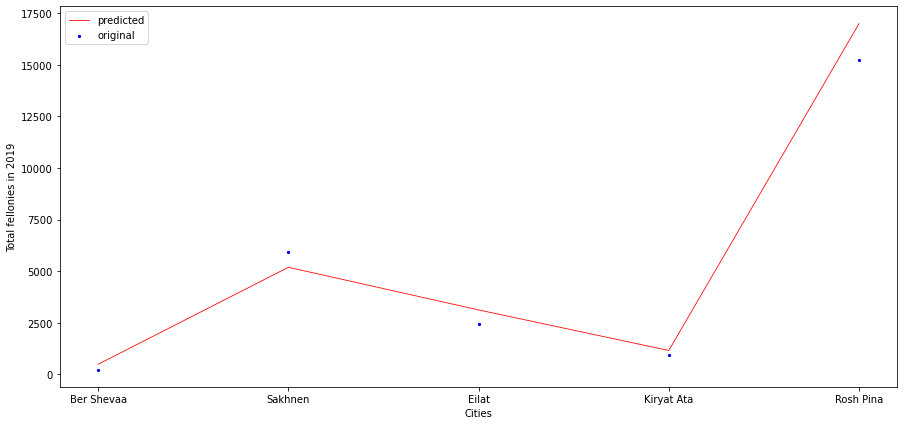

accuracy :  0.9941963139621546


In [168]:
q_5()

We implemnted the algorithm Adaboost to predict the results.
After conducting so many tries with adding/removing features from the training data(choosing the most relevant features), we have got the shown results in the graph above, with almost a perfect accuracy when compaing to the actual data versus the predicted. 
4 out of the 5 cities, the model predicted values almost identical to the actual results as we can see except for one(Rosh Pina) it showed a bigger difference between the predicted value and the actual value.

**Question 6**

In this question we are requested to predict for each city if there's a need in investing more/less time for crimes in each city.

To prepare the data we split it into test and training splits, where the training included data from both cities and crimes for the years 2014-2014, while the test included data from both cities and crimes from the year 2019, which we want to predict it's results.
we further split the data into:
- Train_X :includes the data from both cities(demographics) and crimes from the years 2014_2018
- Train_Y : includes the mean of all the hours the police spent in each city in the years 2014_2018.
- Test_X :includes the data from both cities(demographics) and crimes from the year 2019
- Test_Y : includes the mean of all the hours the police spent in each city in the years 2014_2018.

In this question we also implemented the algorithm AdaBoost.😎

AdaBoostRegressor(learning_rate=1, n_estimators=200)
Mean cross-validataion score: 0.81
K-fold CV average score: 0.85
MSE: 78122869.76
RMSE: 8838.71


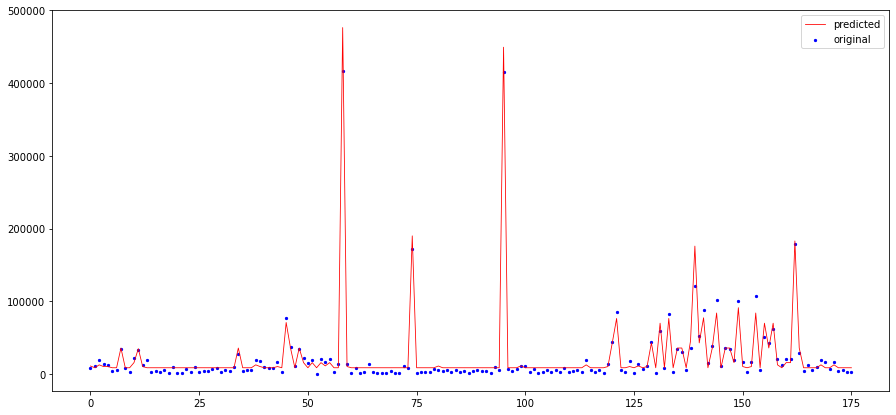

accuracy:  0.9888578218698378


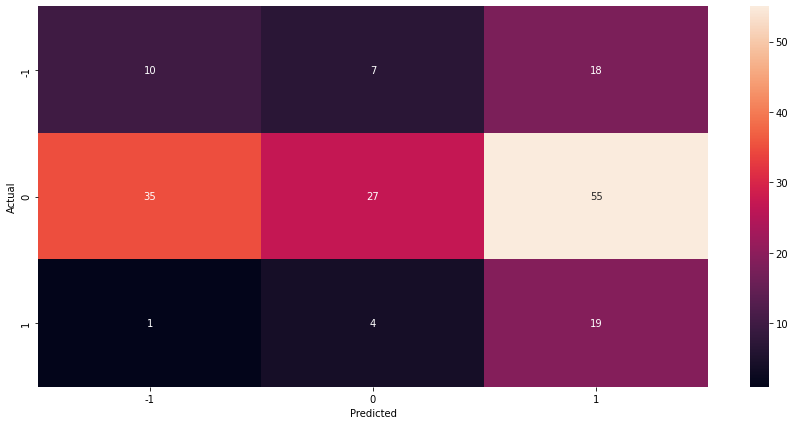

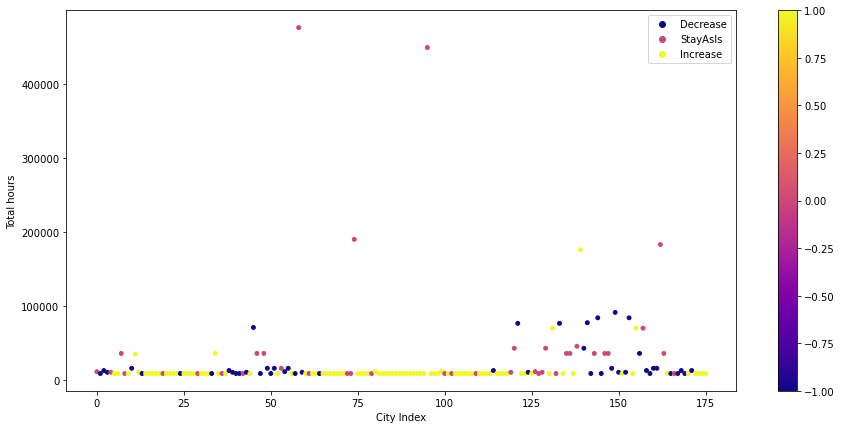

0            מבשרת ציון
1             אור עקיבא
2                 שדרות
3            קרית מלאכי
4                תל שבע
             ...       
171           הוד השרון
172               זרזיר
173    בנימינה גבעת עדה
174           מצפה רמון
175        ביר אל מכסור
Name: city_name, Length: 176, dtype: object

In [169]:
def q_6():
    crimes_relevant = crimes_df.copy()
    cities_relevant = cities_df.copy()

    drop_list = ["Natural Area","Municipal status","Metropolitan Affiliation","Religion","Founding Year","District"
     ,"Residence Shape","Organizational Affiliation","Planning Committee","Police Stations","Local Authority Cluster",]
    #drop_list = ["Founding Year"]
    cities_relevant.drop(drop_list, axis=1, inplace=True)


    tmp_train_crimes = crimes_relevant[crimes_relevant['year'] != 2019].copy()
    tmp_test_crimes = crimes_relevant[crimes_relevant['year'] == 2019].copy()

    tmp_train_crimes.sort_values(by=['city_code'], inplace=True)
    tmp_test_crimes.sort_values(by=['city_code'], inplace=True)
    
    tmp_test_crimes = tmp_test_crimes.applymap(lambda x: str(x).lstrip('city_'))
    tmp_test_crimes["city_code"] = pd.to_numeric(tmp_test_crimes["city_code"])

    grouped_df = tmp_train_crimes.groupby("city_code")
    mean_df = grouped_df.mean()
    tmp_train_crimes = mean_df.reset_index()
    tmp_train_crimes.drop(['year'], axis=1, inplace=True)

    
    tmp_train_crimes = tmp_train_crimes.applymap(lambda x: str(x).lstrip('city_'))
    tmp_train_crimes["city_code"] = pd.to_numeric(tmp_train_crimes["city_code"])


    df_train = pd.merge(tmp_train_crimes,cities_relevant,left_on="city_code",right_on="City Code")

    df_test = pd.merge(tmp_test_crimes,cities_relevant,left_on="city_code",right_on="City Code")
    df_test.drop(['year'], axis=1, inplace=True)

    drop_list = ['City Name','City Code']

    df_train.drop(drop_list, axis=1, inplace=True)

    df_test.drop(drop_list, axis=1, inplace=True)
    #f_test.drop(['city_name'], axis=1, inplace=True)


    working_h = list(working_hours.values())

    def calculate_hours(offenses = []):
        tot = 0
        for ind,val in enumerate(offenses):
            tot += float(val) * working_h[ind]
        return tot

    testX = df_test.iloc[:,2:].values
    testY = []
    for row in tmp_test_crimes.iloc[:,3:].values:
        tot_hours = calculate_hours(row)
        testY.append(tot_hours)
    

    trainX = df_train.iloc[:,1:].values
    trainY = []

    for row in tmp_train_crimes.iloc[:,1:].values:
        tot_hours = calculate_hours(row)
        trainY.append(tot_hours)



    ada_reg = AdaBoostRegressor(n_estimators=200,learning_rate=1)
    print(ada_reg)
    ada_reg.fit(trainX, trainY)
    scores = cross_val_score(ada_reg, trainX,trainY,cv=5)
    print("Mean cross-validataion score: %.2f" % scores.mean())
    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_val_score(ada_reg, trainX, trainY, cv=kfold )
    print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

    ypred = ada_reg.predict(testX)
    mse = mean_squared_error(testY,ypred)
    print("MSE: %.2f" % mse)
    print("RMSE: %.2f" % np.sqrt(mse))

    x_ax = range(len(testY))
    plt.scatter(x_ax, testY, s=5, color="blue", label="original")
    plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
    plt.legend()
    plt.show()
    print("accuracy: ",ada_reg.score(trainX, trainY))


    # -1 decrease
    # 0 do nothing
    # 1 increase
    threshold = 0.15
    #7979.0
    #
    prev_crimes = tmp_train_crimes.iloc[:,1:].values
    prev_crimes_res = []
    for row in prev_crimes:
        tot_hours = calculate_hours(row)
        prev_crimes_res.append(tot_hours)


    cities = df_test.iloc[:,0].values
    
    res_actu = []
    for index,value in enumerate(testY):
        prev_val = prev_crimes_res[index]
        if ((value/prev_val) > (1+threshold)) :
            decision = 1
        elif ((value/prev_val) < (1-threshold)) :
            decision = -1
        else :
            decision = 0
        res_actu.append(decision)

    res_pred = []
    for index,value in enumerate(ypred):
        prev_val = prev_crimes_res[index]
        if ((value/prev_val) > (1+threshold)) :
            decision = 1
        elif ((value/prev_val) < (1-threshold)) :
            decision = -1
        else :
            decision = 0
        
        res_pred.append(decision)


    res_pred = np.array(res_pred)
    res_actu = np.array(res_actu)



    data_conf = {'y_Actual':    res_actu,
        'y_Predicted': res_pred
        }

    df_conf = pd.DataFrame(data_conf, columns=['y_Actual','y_Predicted'])

    confusion_matrix = pd.crosstab(df_conf['y_Actual'], df_conf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True)
    plt.show()
    
    
    #scatterplot
    x = np.arange(start=0, stop=176, step=1)
    y = ypred
    z =res_pred
    
    scatter = plt.scatter(x,y, c=z, s=15,cmap=cmx.plasma)
    cbar= plt.colorbar()
    plt.legend(handles=scatter.legend_elements()[0],labels =['Decrease','StayAsIs','Increase'])
    plt.xlabel("City Index")
    plt.ylabel("Total hours")

    plt.show()
    #in case we want to see al the cities labels
    #pd.set_option('display.max_rows', 200)
    display(df_test.iloc[:,0])
q_6()    

From the graphs above we can conclude for each city the predicted investment time compared to the actual investment time spent in the year 2019.
We defined a threshold of 0.15, and compared the actual results with the predicted results compared to the threshold we defined for each city, where bigger values than the threshold are supposed to get more investment(decision=1), smaller get less investment (decision=-1), while any city value that lies in between are cities that do not need any change in investment.
We got good prediction compared to the actual hours spent in 2019, we can see that by looking at the correlation matrix we can see that we got a lot of true positives and a few false positives.



**Question 7**

In this question we took the results from question 5 and the clusters that were created in question 3 as a feature and applied Adaboost

In [170]:
def q_7():
    city_clusters = cluster_df[['Clusters','city_code']].copy().drop_duplicates(subset=["Clusters", "city_code"])
    city_clusters.columns = ['Clusters', 'City Code']
    city_clusters = city_clusters.drop_duplicates(subset=["City Code"])
    print('Without clusters data:')
    q_5()
    print('******* With clusters data: *******')
    q_5(city_clusters)
    print()

Without clusters data:
AdaBoostRegressor(n_estimators=200)
Mean cross-validataion score: 0.82
K-fold CV average score: 0.90
MSE: 825853.49
RMSE: 908.76


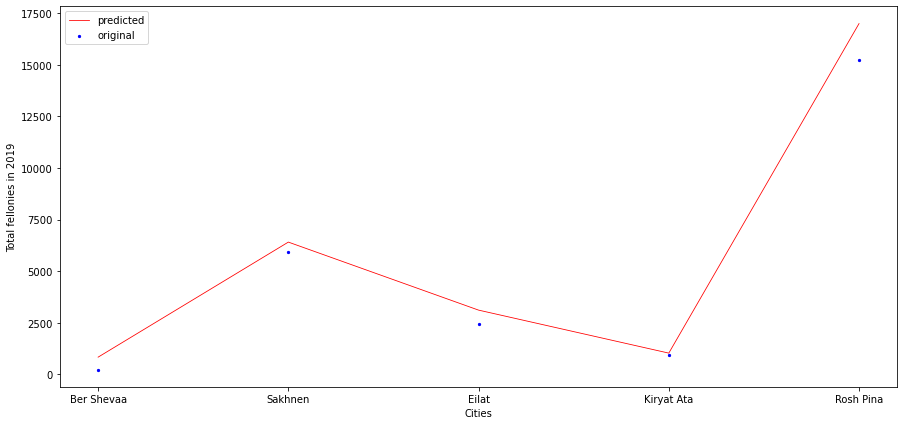

accuracy :  0.9905324935123868
******* With clusters data: *******
AdaBoostRegressor(n_estimators=200)
Mean cross-validataion score: 0.78
K-fold CV average score: 0.88
MSE: 4682085.17
RMSE: 2163.81


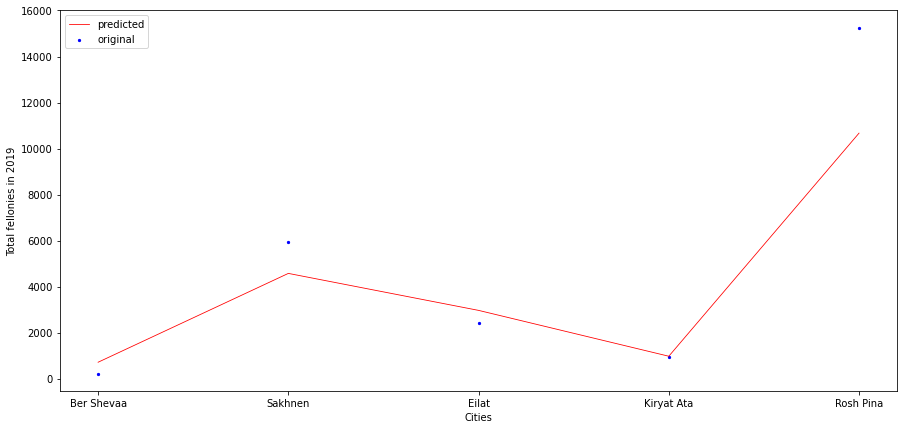

accuracy :  0.9934804228388237



In [171]:
q_7()

surprisingly or not the results were more accurate for 4 of 5 test cities but the 5th city the prediction was worse than running the model without the new feature.